# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The TMDb dataset we are going to analyze contains information about 10,000 movies collected from the Movie Database, TMDb. It provides details about revenue, budget, votes, cast, production companies among others related to movies that span a period of more than 50 years.

The following questions will be answered as we analyze the data.
<ol>
    <li><a href="#genre">What are the Popular Genres From Year to Year</a></li>
    <li><a href="#revenue">What is the Yearly Revenue Change</a></li>
    <li><a href="#props">What are the properties associated with High Revenue Movies?</a></li>
    <li><a href="#director">Which Director directed Most Of the Top 20 Movies?</a></li>
    <li><a href="#actor">Which Actor is Present in Most of the Top 20 Revenue Movies?</a></li>
    <li><a href="#company">Which Production Company produced Most of Top 20 Revenue movies?</a></li>
    <li><a href="#title">What Are 20 The Top Revenue Movies From 1960 to 2015</a></li>
</ol>

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

# Initialize seaborn and magic commands
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# load tmdb-movies csv into a dataframe
movies_df = pd.read_csv('tmdb-movies.csv')

# Examine first 5 rows
movies_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check the number of rows and columns
movies_df.shape

(10866, 21)

In [4]:
# Get a quick statistics of the dataset
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
# View more details about the dataset
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# check the columns with empty values
movies_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check for number of duplicates
movies_df.duplicated().sum()

1

### Data Cleaning

We observe from our initial checks on our dataset that there are duplicates and some missing values.

We are going to remove the duplicates and replace missing values in the following columns: 
**cast, director, keywords, genres, production_companies**

We will also drop some columns that will not be relevant to the questions we want to address i.e. 
**imdb_id, homepage, tagline and overview**

We saw that the **budget, revenue, budget_adj, revenue_adj** columns had a min value of 0.0 which implies some of the rows in these columns had a value of 0.0 which is not desirable for our analysis. These rows will be removed as well.

In [8]:
# remove duplicates
movies_df.drop_duplicates(inplace=True)

In [9]:
# verify duplicates removal
movies_df.duplicated().sum()

0

In [10]:
# confirm the new number of rows
movies_df.shape

(10865, 21)

In [11]:
# drop imdb_id, homepage, tagline and overview columns. 
movies_df.drop(['imdb_id', 'homepage','tagline', 'overview'], axis=1, inplace=True )
movies_df.shape

(10865, 17)

In [12]:
# remove rows if the budget or revenue or budget_adj or revenue_adj is 0.0
movies_df = movies_df.loc[(movies_df.budget * movies_df.revenue * movies_df.budget_adj* movies_df.revenue_adj) != 0]
movies_df.shape

(3854, 17)

In [13]:
# fill the missing values in the following columns with the values indicated
# cast = 'no_cast'
# director = 'no_director'
# keywords = 'no_keywords'
# genres = 'no_genres'
# production_companies = 'no_production_companies'

columns_to_fillna = ['cast', 'director', 'keywords', 'genres', 'production_companies']
for column in columns_to_fillna:
    movies_df[column] = movies_df[column].fillna('no_'+column)

# check the number of null values again
movies_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Helper Functions To Be used in the Analysis

In [14]:
def generate_plot(x_val, y_val, fig_size, title, x_label, y_label):
    """
    This functions takes inputs for a bar graph and produces a plot based on the inputs
    """
    plt.subplots(figsize=fig_size)
    sns.barplot(x_val, y_val)
    plt.title(title, fontsize=30)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20);

In [15]:
def generate_value_and_count(data):
    """
    This functions takes a column and separates the pipe-separated values and return a dict of
    the value and the number of times it occurs
    """    
    val_list = [val.split('|') for val in data]
    
    top_val_list = []
    for new_val in val_list:
        for single in new_val:
            top_val_list.append(single)

    # get the value and count of each item in the top_val_list
    val_and_count = dict()
    for i in top_val_list:
        val_and_count[i] = val_and_count.get(i, 0)+1
    
    return val_and_count

<a id="genre"></a>
### Research Question 1 - What are the Popular Genres From Year To Year

I used **vote_average** as the metric for popularity with the understanding that the average votes given to a movies reflects its popularity among consumers

**Drama, Western, Romance** were the popular genres in the earliest decade.

**Western, Drama, Thriller** became popular in the most recent.

We therefore observe that both Western and Drama genres remained popular in both past and recent times.

The last is a visualization of the various genres associated with the 5 top popular movies for each year

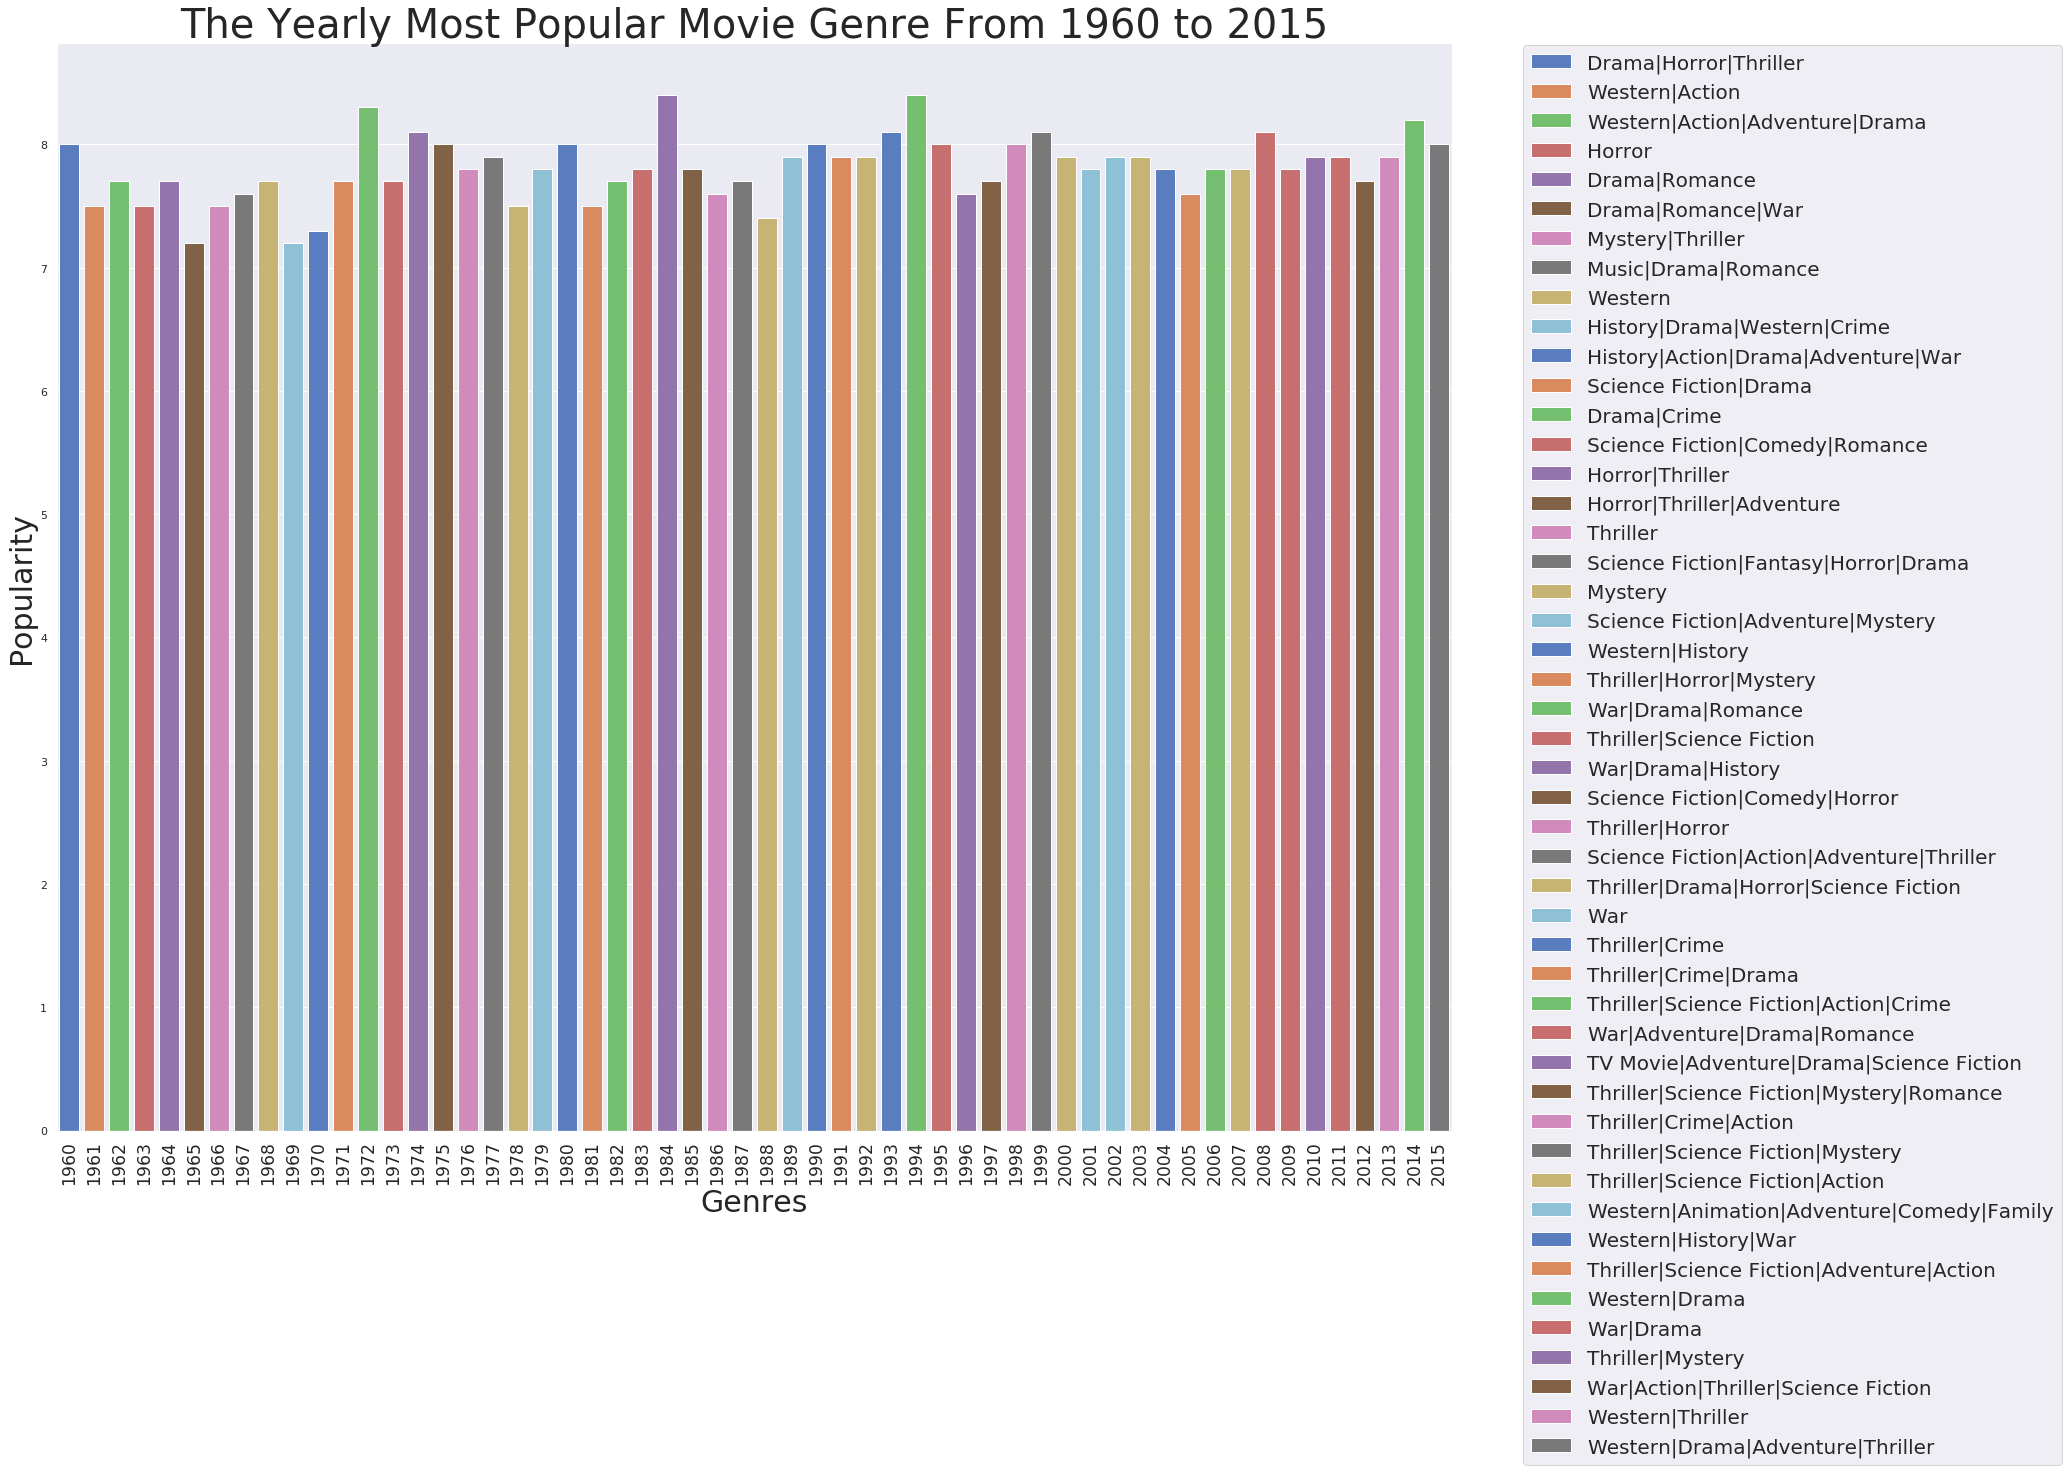

In [16]:
# Get the Most Popular Genre in Each Release Year
popular_genre_per_year = movies_df.groupby(['release_year'])[['vote_average','genres']].max()
plt.subplots(figsize=(25, 20))
graph = sns.barplot(
                    popular_genre_per_year.index,
                    popular_genre_per_year['vote_average'],
                    hue=popular_genre_per_year['genres'],
                    dodge=False,
                    palette='muted',
                   )
graph.set_xticklabels(graph.get_xticklabels(),
                      rotation=90,
                      fontweight='light',fontsize='xx-large'
                     )
graph.axes.set_title("The Yearly Most Popular Movie Genre From 1960 to 2015",fontsize=40)
graph.set_xlabel("Genres",fontsize=30)
graph.set_ylabel("Popularity",fontsize=30);

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1, prop={'size': 20});


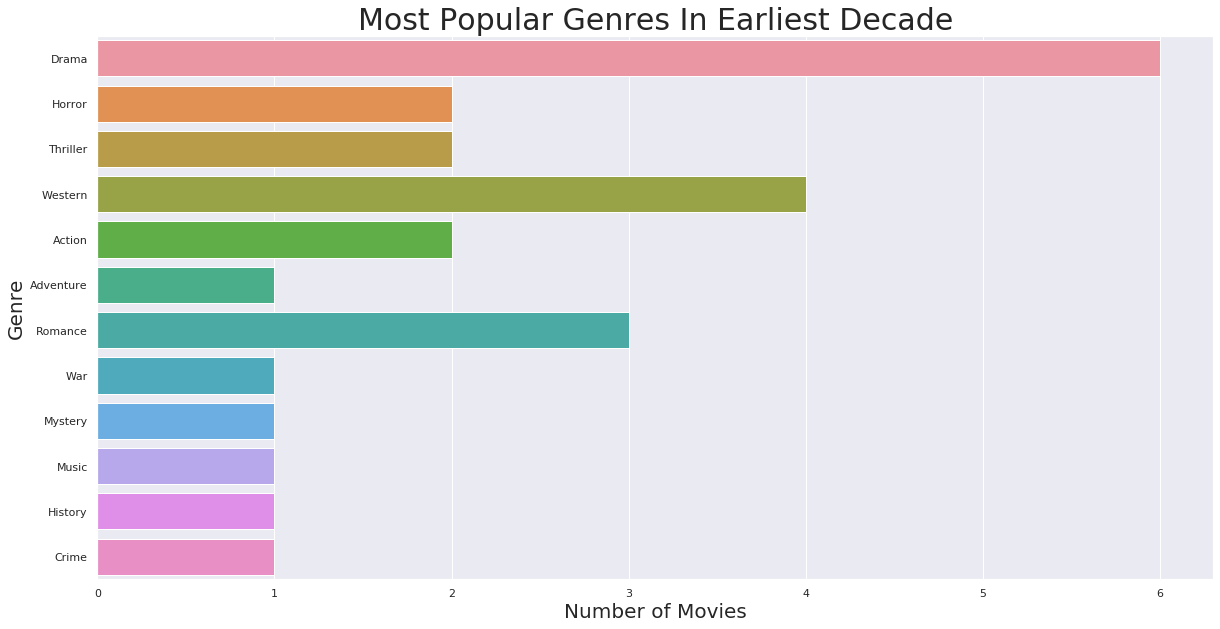

In [17]:
# Find the most popular genre in the first earliest decade
earliest_decade = popular_genre_per_year.head(10)['genres']
earliest_decade_genres = generate_value_and_count(data=earliest_decade)
earliest_decade_genres_df = pd.DataFrame.from_dict(earliest_decade_genres, orient="index")
# Generate the Plot
generate_plot(x_val=earliest_decade_genres_df[0],
              y_val=earliest_decade_genres_df.index,
              fig_size=(20,10),
              title='Most Popular Genres In Earliest Decade',
              x_label='Number of Movies',
              y_label='Genre'
             )

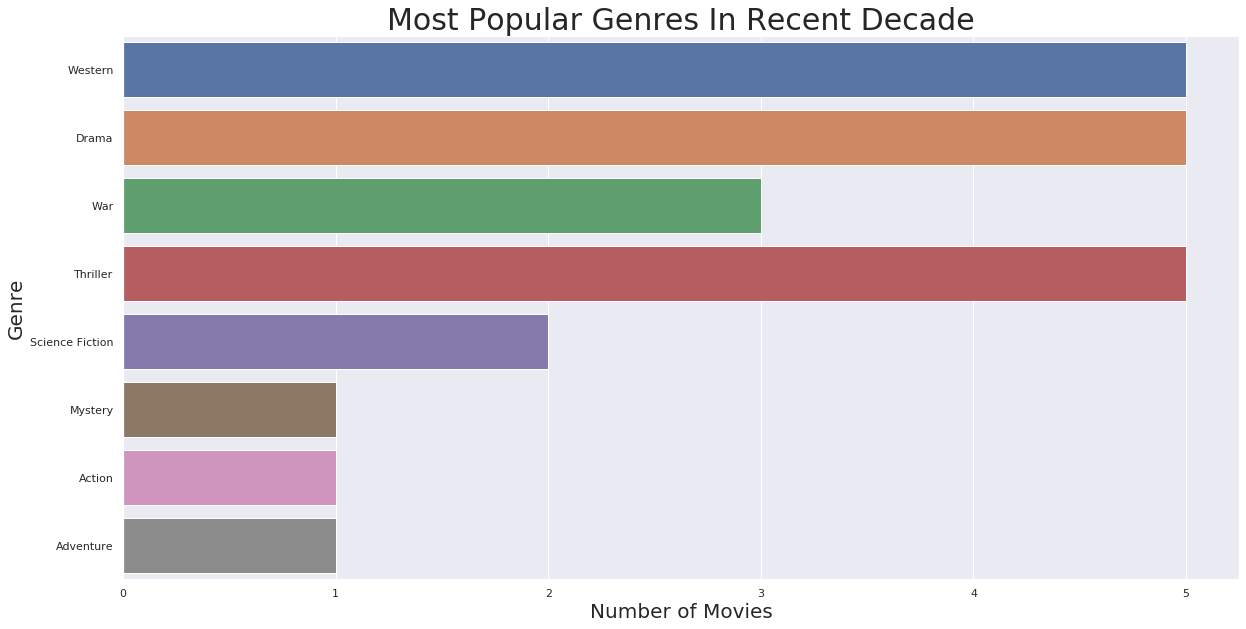

In [18]:
# Find the most popular genre in the most recent decade
recent_decade = popular_genre_per_year.tail(10)['genres']
recent_decade_genres = generate_value_and_count(data=recent_decade)
recent_decade_genres_df = pd.DataFrame.from_dict(recent_decade_genres, orient="index")
# Generate the Plot
generate_plot(x_val=recent_decade_genres_df[0],
              y_val=recent_decade_genres_df.index,
              fig_size=(20,10),
              title='Most Popular Genres In Recent Decade',
              x_label='Number of Movies',
              y_label='Genre'
             )

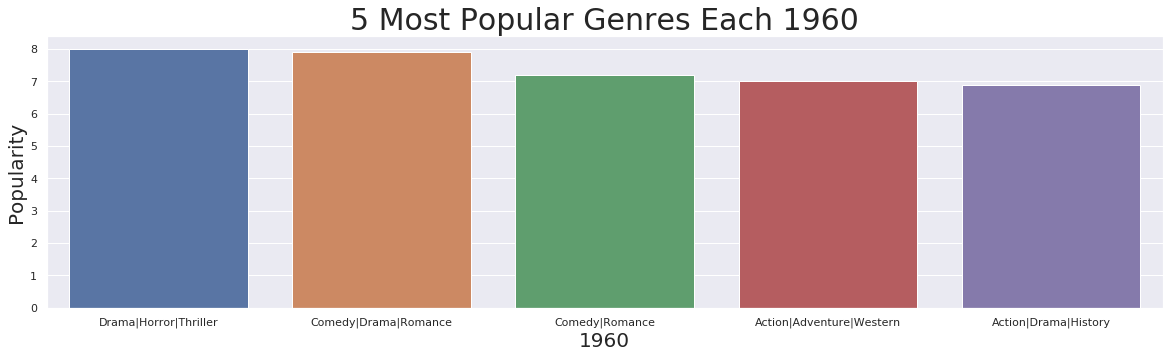

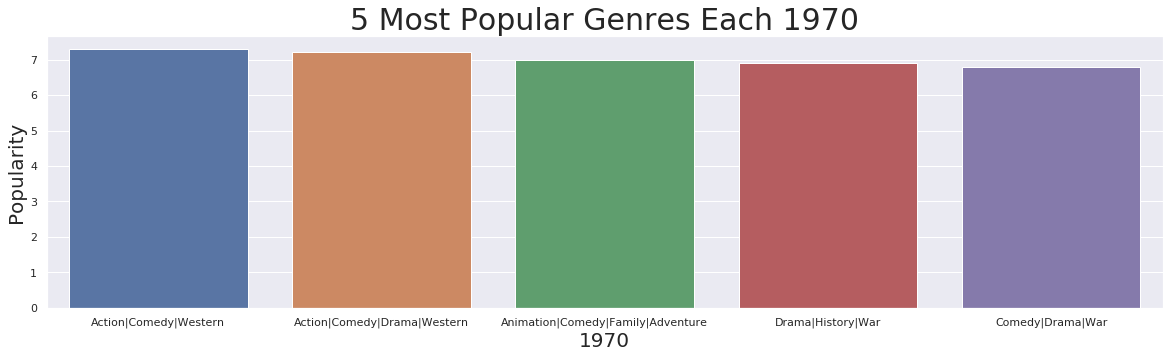

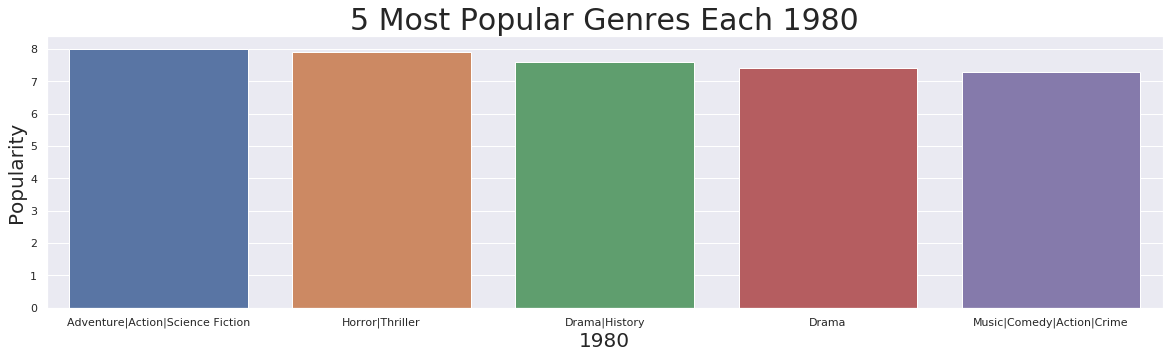

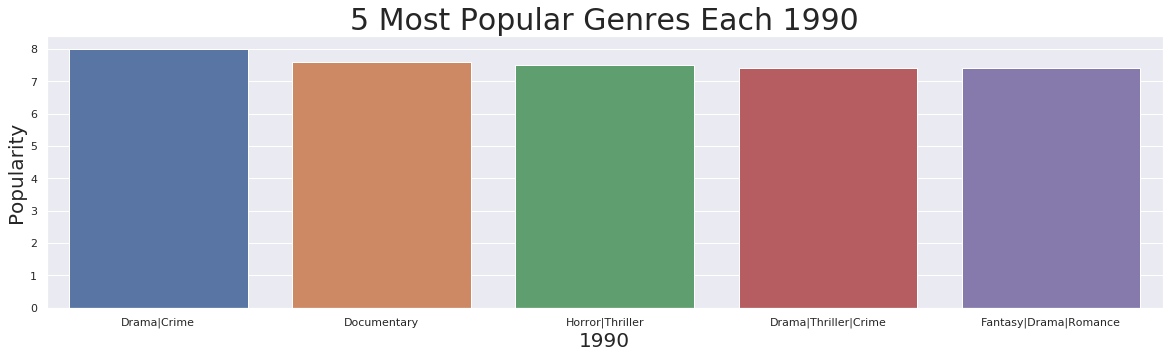

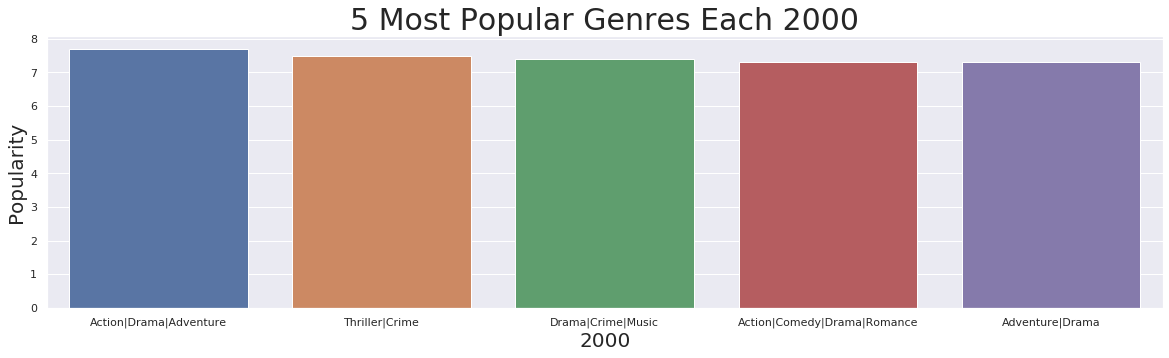

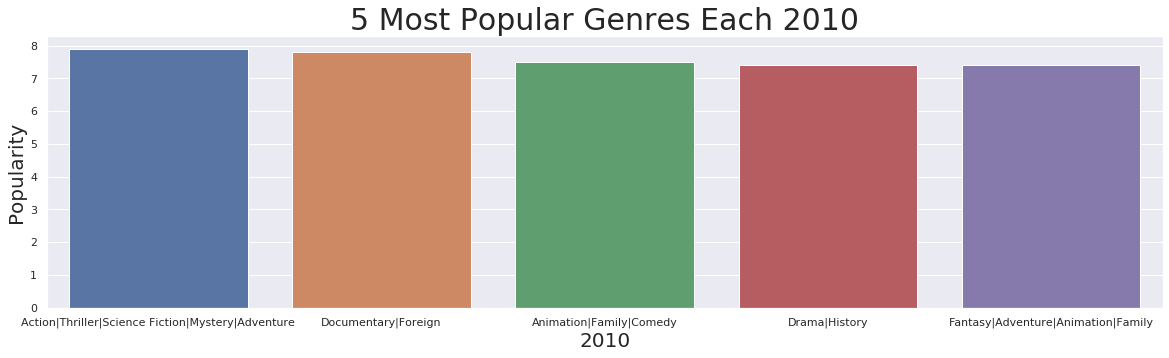

In [19]:
# Group The Genres by Year and Find the Most Popular Ones in Each Year using vote_average as the popularity metric
for year in np.arange(1960,2016, 10): # Interval can be changed if all the years need to appear.
    df = movies_df.query('release_year == @year').groupby('genres').mean().sort_values(by=['vote_average'], ascending=False).head(5)
    generate_plot(x_val=df.index,
                  y_val=df['vote_average'],
                  fig_size=(20,5),
                  title=f"5 Most Popular Genres Each {year}",
                  x_label=year,
                  y_label='Popularity'
                 )


<a id="revenue"></a>
### Research Question 2 - What is the Yearly Revenue Change

The change in revenue from year to year does not seem to follow any particular pattern. This could be due to unequal number of movies produced in each year, directly affecting the total sum of revenue generated by year.

The difference in budget and revenue shows a significant increase in the last decade as captured the dataset.
This could be attributed to efficient and improved technologies and distribution channels in recent times.

A movie with a high budget is likely to help in all marketing and sales efforts to boost revenue generated.

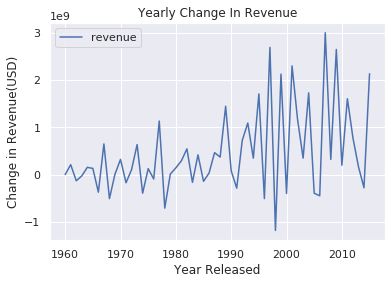

In [20]:
# Find the Sum of the Various Columns According to the Year the Movies Were Released
yearly_movies_sum = movies_df.groupby('release_year').sum()

# Find The Yearly Change in Revenue
yearly_movies_sum.apply(lambda x:x.diff().fillna(0))[['revenue']].plot()
plt.xlabel('Year Released')
plt.ylabel('Change in Revenue(USD)')
plt.title('Yearly Change In Revenue');

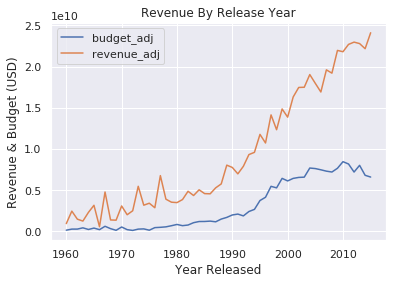

In [21]:
# Compare the Yearly sum for budget_adj and revenue_adj
yearly_movies_sum[['budget_adj', 'revenue_adj']].plot()
plt.xlabel('Year Released')
plt.ylabel('Revenue & Budget (USD)')
plt.title('Revenue By Release Year');

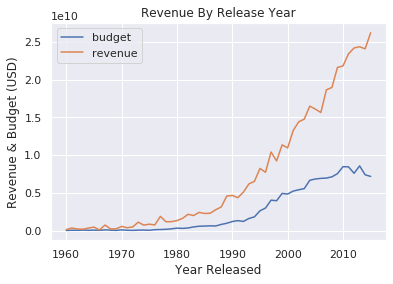

In [22]:
# Compare the Yearly sum for budget and revenue
yearly_movies_sum[['budget', 'revenue']].plot()
plt.xlabel('Year Released')
plt.ylabel('Revenue & Budget (USD)')
plt.title('Revenue By Release Year');

<a id="props"></a>
### Research Question 3 - What are the properties associated with High Revenue Movies?

I chose movies with a Revenue Greater than the 90th Percentile as High Revenue Movies.
I looked at the distribution of the other columns to get a fair idea of the properties associated with the high revenue movies

* Budget: Most of them had a budget between 25 Million to 200 Million USD.
* Average Vote: The average vote by consumers was mostly between 6.0 and 7.5 with very few at the 8.0 mark.
* Runtime: Another property worth looking at is how lengthy these high revenue movies were. Most had a runtime between 80mins and 150 mins. We observe that very few lenghty movies are high revenue movies.
* Year of Release: Most of these high revenue movies were also released in the last decade of the year under review, i.e 1960 to 2015.



In [23]:
# I chose movies with a Revenue Greater than the 90th Percentile as High Revenue Movies

# Calculate the 90th Percentile Revenue
ninety_percentile = np.percentile(movies_df['revenue_adj'], 90)

# Filter the movies with movies with revenue greater than 90th Percentile
highest_revenue_movies = movies_df.query('revenue_adj > @ninety_percentile')

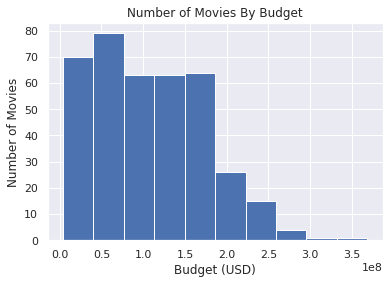

In [24]:
# Check the Budget for of High Revenue Movies
highest_revenue_movies['budget_adj'].hist()
plt.xlabel('Budget (USD)')
plt.ylabel('Number of Movies')
plt.title('Number of Movies By Budget');

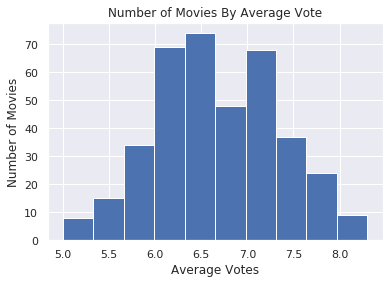

In [25]:
# Check the Vote Average (Popularity Metric) of High Revenue Movies
highest_revenue_movies['vote_average'].hist()
plt.xlabel('Average Votes')
plt.ylabel('Number of Movies')
plt.title('Number of Movies By Average Vote');

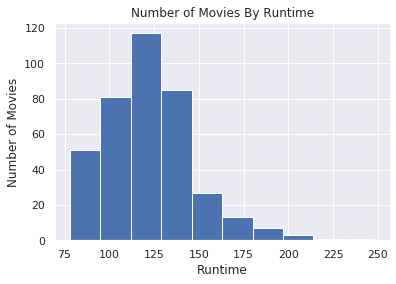

In [26]:
# Check the Runtime of High Revenue Movies - How Long The Movies span
highest_revenue_movies['runtime'].hist()
plt.xlabel('Runtime')
plt.ylabel('Number of Movies')
plt.title('Number of Movies By Runtime');

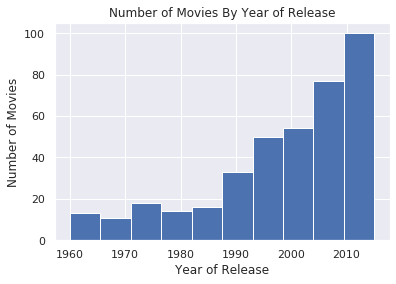

In [27]:
# Check the Release Year of High Revenue Movies
highest_revenue_movies['release_year'].hist()
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies')
plt.title('Number of Movies By Year of Release');


### Define Variables to be used in The Next Analysis

In [28]:
# Find the top 20 revenue movies
top_20_revenue = highest_revenue_movies.sort_values(by=['revenue_adj'], ascending=False).head(20)

<a id="director"></a>
### Research Questions 4 - Which Director directed **Most** Of the Top 20 Movies?

We realize that for some movies, they had more than 1 director, directing the movies. I therefore looked at the number of times an individual director, directed or was part of the team that directed a movie.

**Steven Spielberg** was first, directing 3 top revenue movies, followed **James Cameron, Josh Whedon and Wolfgang Reitherman** with 3 movies each.

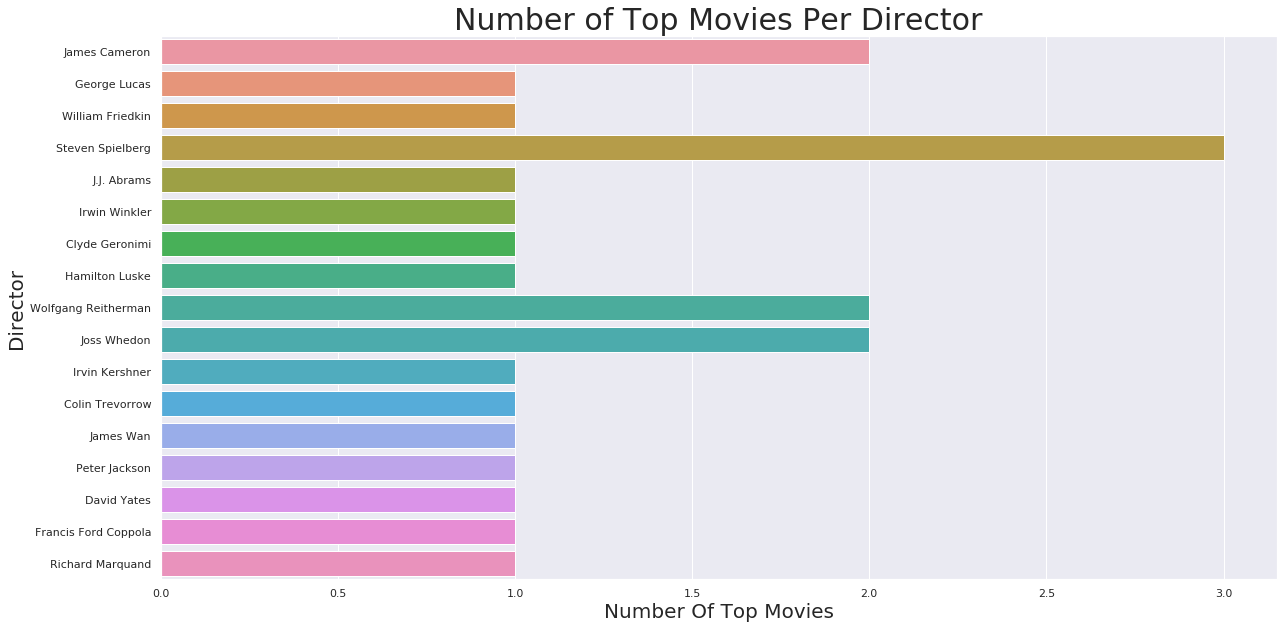

In [29]:
# Find the Director That Featured on Most of the Highest Revenue Movies

director_counts = generate_value_and_count(data=top_20_revenue['director'])
director_count_df = pd.DataFrame.from_dict(director_counts, orient="index")

# Generate the Plot
generate_plot(x_val=director_count_df[0],
              y_val=director_count_df.index,
              fig_size=(20,10),
              title='Number of Top Movies Per Director',
              x_label='Number Of Top Movies',
              y_label='Director'
             )

<a id="actor"></a>
### Research Question 5  - Which Actor is Present in **Most** of the Top 20 Revenue Movies?

Over here we first pick the actors who featured in each of the top 20 revenue movies. We then find the number of movies that all the individual actors featured in.
The top 3 who were most present in the top 20 high revenue movies were **Carrie Fisher, Mark Hamill and Harrison Ford**

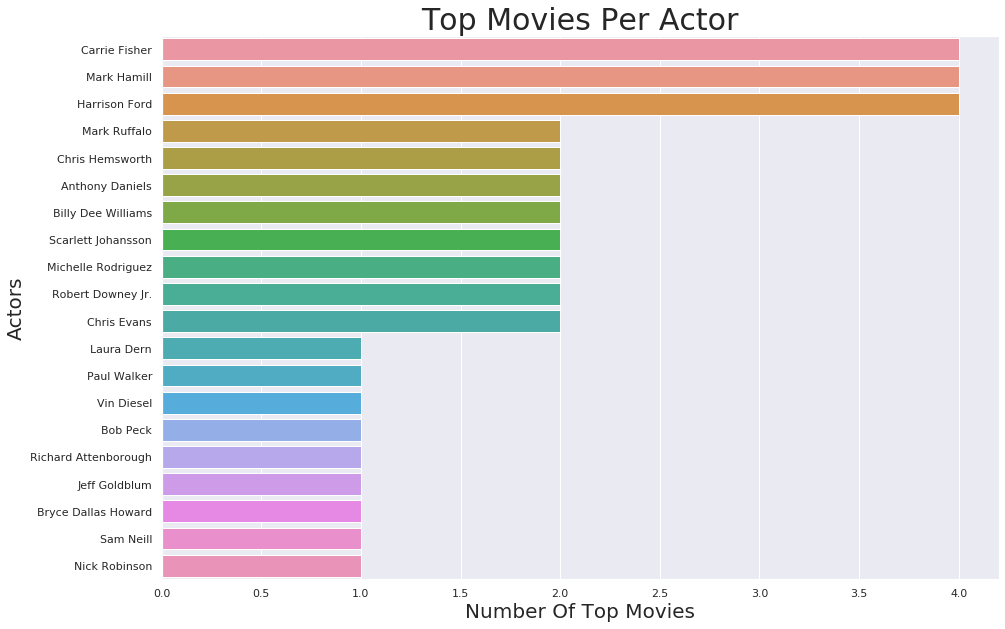

In [30]:
# Find the Actor That Featured on Most of the Highest Revenue Movies
actor_counts = generate_value_and_count(data=top_20_revenue['cast'])
actor_count_df = pd.DataFrame.from_dict(actor_counts, orient="index").sort_values(by=[0], ascending=False).head(20)

# Generate the Plot
generate_plot(x_val=actor_count_df[0],
              y_val=actor_count_df.index,
              fig_size=(15,10),
              title='Top Movies Per Actor',
              x_label='Number Of Top Movies',
              y_label='Actors'
             )

<a id="company"></a>
### Research Question 6  - Which Production Company produced **Most** of the Top 20 Revenue movies?


**Twentieth Century Fox Film Corporation** was first followed by **Lucas Film and Universal Pictures** as the production companies that produced or were part of the production of the top 20 revenue movies.
We used the number of occurences of a production company in all the top 20 revenue movies as the metric for this.

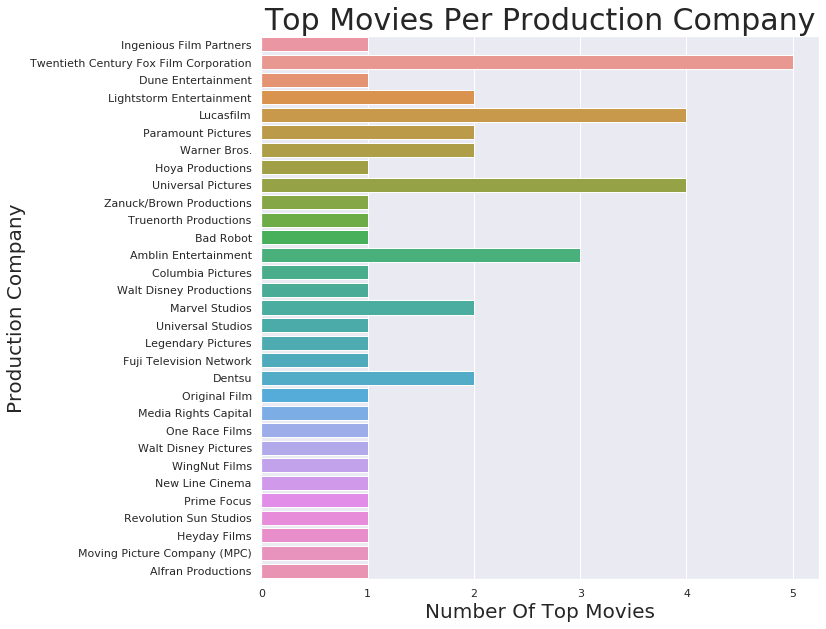

In [31]:
# Find the Production Company That Featured in Most of the Highest Revenue Movies
company_counts = generate_value_and_count(data=top_20_revenue['production_companies'])
company_count_df = pd.DataFrame.from_dict(company_counts, orient="index")

# Generate the Plot
generate_plot(x_val=company_count_df[0],
              y_val=company_count_df.index,
              fig_size=(10,10),
              title='Top Movies Per Production Company',
              x_label='Number Of Top Movies',
              y_label='Production Company'
             )

<a id="title"></a>
### Research Question 7 - What Are The Top 20 Revenue Movies From 1960 to 2015?

We found out that **Avatar** is the Highest Revenue Movie from 1960 to 2015

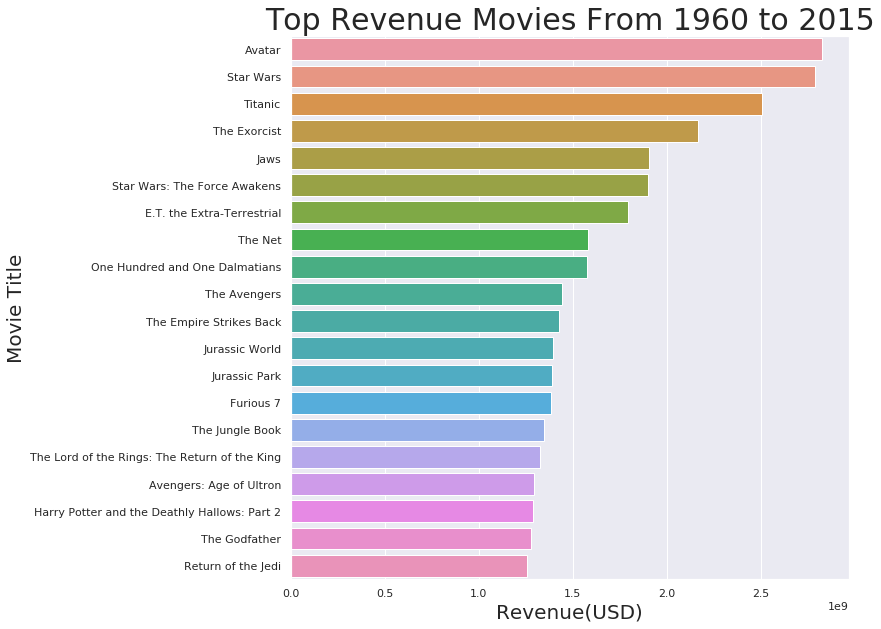

In [32]:
# Generate plots for highest revenue movies
generate_plot(x_val=top_20_revenue['revenue_adj'],
              y_val=top_20_revenue['original_title'],
              fig_size=(10,10),
              title='Top Revenue Movies From 1960 to 2015',
              x_label='Revenue(USD)',
              y_label='Movie Title'
             )

<a id='conclusions'></a>
## Conclusions

We tried to answer all the questions we asked ourselves at the start of this analysis though we realize that the data that was left after cleaning the data was very small.

The other challenge we observe is the unequal distribution of the number of movies produced each year. It follows that, the comparison among the various years especially in terms of total revevenue generated would not be fair.

This is due to the fact that a lot of the data on revenue was 0 and not desirable and all those corresponding rows had to be dropped. All the observations are therefore tentative.

We observe that:
* There has been an increase in revenue in relation to the budget that is set aside for producing the movies over the years.
* Avata stood out as the highest revenue movie with the 50+ year period the data spans.
* The Drama and Western genres seem to have maintained popularity among consumers over this period.

### References
<ul>
    <li><a href="https://stackoverflow.com" target="blank">Stackoverflow</a></li>
    <li><a href="https://seaborn.pydata.org" target="blank">Seaborn Documentation</a></li>
    <li><a href="https://docs.scipy.org/doc/numpy/reference" target="blank">Numpy Documentation</a></li>
    <li><a href="https://pandas.pydata.org/docs/reference/frame.html" target="blank">Pandas Documentation</a></li>
</ul>